In [2]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
##########################
# pA Testing Starts Here #
##########################

In [218]:
daily_pA = pd.read_csv('Resources/daily_pA.csv',index_col=False)

In [219]:
daily_pA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Data columns (total 5 columns):
datetime                 4509 non-null object
average_exhaustion       4509 non-null float64
average_sA               4509 non-null float64
number_extract_points    4509 non-null float64
pA                       4509 non-null float64
dtypes: float64(4), object(1)
memory usage: 176.2+ KB


In [220]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pA[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pA['pA'].values.reshape(-1,1)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [222]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [223]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [224]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [27]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [35]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [36]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1, gamma=0.001, score=0.147, total=   0.4s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.173, total=   0.4s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.128, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.165, total=   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.159, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.147, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.173, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.128, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.165, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   29.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [37]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
0.15447350843362936


In [38]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [39]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.149, total=   0.5s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.173, total=   0.5s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.133, total=   0.6s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.170, total=   0.5s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.169, total=   0.5s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.173, total=   0.7s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.191, total=   0.6s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.169, total=   0.5s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.189, total=   0.5s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] .

[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.150, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.177, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.134, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.169, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.165, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.189, total=   0.3s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.202, total=   0.4s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] .

[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.248, total=   0.4s
[CV] C=10, epsilon=0.01, gamma=0.1 ...................................
[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.244, total=   0.4s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.153, total=   0.3s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.178, total=   0.3s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.136, total=   0.3s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.172, total=   0.3s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.166, total=   0.3s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   49.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
0.2568486875217863


In [45]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [46]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.4s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.009, total=   0.3s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.011, total=   0.3s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.000, total=   0.3s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.005, total=   0.3s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.022, total=   0.3s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.018, total=   0.3s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.019, total=   0.3s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0

[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.165, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.168, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.142, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.124, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.003, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.007, total=   0.3s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.009, t

[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.002, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.007, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.009, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.000, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.003, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.038, total=   0.3s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.059, tota

[CV]  C=1, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.1, score=0.202, total=   0.3s
[CV] C=1, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.1 .
[CV]  C=1, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.1, score=0.233, total=   0.3s
[CV] C=1, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.1 .
[CV]  C=1, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.1, score=0.205, total=   0.3s
[CV] C=1, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.1 .
[CV]  C=1, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.1, score=0.194, total=   0.3s
[CV] C=1, coef0=4.929735655570195, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=4.929735655570195, degree=2, epsilon=0.1, gamma=0.001, score=0.149, total=   0.2s
[CV] C=1, coef0=4.929735655570195, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=4.929735655570195, degree=2, epsilon=0.1, gamma=0.001, score=0.175, total=   0.2s
[CV] C=1, coef0=4.929735655570195, degree=2, epsilon=0.

[CV]  C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001, score=0.151, total=   0.2s
[CV] C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001, score=0.177, total=   0.2s
[CV] C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001, score=0.133, total=   0.3s
[CV] C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001, score=0.169, total=   0.3s
[CV] C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.001, score=0.163, total=   0.2s
[CV] C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=4.929735655570195, degree=3, epsilon=0.1, gamma=0.01, score=0.191, total=   0.3s
[CV] C=1, coef0=4.929735655570195, degree=3, epsilon

[CV]  C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.001, score=0.180, total=   0.4s
[CV] C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01, score=0.195, total=   0.8s
[CV] C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01, score=0.207, total=   0.7s
[CV] C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01, score=0.236, total=   0.7s
[CV] C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01, score=0.207, total=   0.7s
[CV] C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01 .
[CV]  C=1, coef0=4.929735655570195, degree=4, epsilon=0.1, gamma=0.01, score=0.197, total=   0.8s
[CV] C=1, coef0=4.929735655570195, degree=4, epsilon=0.1

[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.062, total=   0.3s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.035, total=   0.3s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.018, total=   0.3s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.002, total=   0.2s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.009, total=   0.2s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.011, total=   0.2s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.001, t

[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.006, total=   0.2s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.009, total=   0.2s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=0.004, total=   0.2s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.000, total=   0.2s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.029, total=   0.3s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.059, total=   0.3s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.079, 

[CV]  C=5, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.1, score=0.205, total=   0.6s
[CV] C=5, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.1, score=0.192, total=   0.7s
[CV] C=5, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.001, score=0.148, total=   0.3s
[CV] C=5, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.001, score=0.175, total=   0.3s
[CV] C=5, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.001, score=0.131, total=   0.3s
[CV] C=5, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.929735655570195, degree=2, epsilon=0.01, gamma=0.001, score=0.167, total=   0.3s
[CV] C=5, coef0=4.929735655570195, degree=2

[CV]  C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.001, score=0.151, total=   0.3s
[CV] C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.001, score=0.179, total=   0.3s
[CV] C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.001, score=0.173, total=   0.3s
[CV] C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.01, score=0.192, total=   0.4s
[CV] C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.01, score=0.204, total=   0.4s
[CV] C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=4.929735655570195, degree=3, epsilon=0.01, gamma=0.01, score=0.234, total=   0.4s
[CV] C=5, coef0=4.929735655570195, degree=3, e

[CV]  C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.01, score=0.210, total=   1.2s
[CV] C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.01, score=0.246, total=   1.2s
[CV] C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.01, score=0.216, total=   1.1s
[CV] C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.01, score=0.206, total=   1.1s
[CV] C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.1 .
[CV]  C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.1, score=0.235, total=   9.5s
[CV] C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.1 .
[CV]  C=5, coef0=4.929735655570195, degree=4, epsilon=0.01, gamma=0.1, score=0.249, total=   8.1s
[CV] C=5, coef0=4.929735655570195, degree=4, epsilon=

[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.061, total=   0.3s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.032, total=   0.3s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.022, total=   0.3s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=0.002, total=   0.2s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.002, total=   0.2s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.003, total=   0.2s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=0.005, t

[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.068, total=   0.2s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.076, total=   0.2s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.060, total=   0.2s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.078, total=   0.2s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.080, total=   0.2s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.119, total=   0.3s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.167, total=   

[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.044, total=   0.3s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.034, total=   0.3s
[CV] C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.001, score=0.148, total=   0.2s
[CV] C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.001, score=0.174, total=   0.2s
[CV] C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.001, score=0.133, total=   0.2s
[CV] C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, gamma=0.001, score=0.168, total=   0.2s
[CV] C=10, coef0=4.929735655570195, degree=2, epsilon=0.001, 

[CV]  C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.001, score=0.189, total=   0.3s
[CV] C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.001, score=0.164, total=   0.3s
[CV] C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.001, score=0.186, total=   0.3s
[CV] C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.001, score=0.178, total=   0.3s
[CV] C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.01, score=0.194, total=   0.6s
[CV] C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.929735655570195, degree=3, epsilon=0.001, gamma=0.01, score=0.203, total=   0.6s
[CV] C=10, coef0=4.929

[CV]  C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.001, score=0.190, total=   0.5s
[CV] C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01, score=0.201, total=   2.0s
[CV] C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01, score=0.213, total=   1.8s
[CV] C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01, score=0.246, total=   1.9s
[CV] C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01, score=0.220, total=   1.9s
[CV] C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.929735655570195, degree=4, epsilon=0.001, gamma=0.01, score=0.214, total=   1.8s
[CV] C=10, coef0=4.929735655

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed: 13.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 4.929735655570195],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [51]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 1, 'coef0': 4.929735655570195, 'degree': 4, 'epsilon': 0.001, 'gamma': 0.1}
0.24410732172533922


RBF SVR yielded the best results at 0.257 while polynomial (4th degree) was a close second at 0.244. Both have greater scores than the OLS model at 0.173. RBF will be used for Daily pA regression

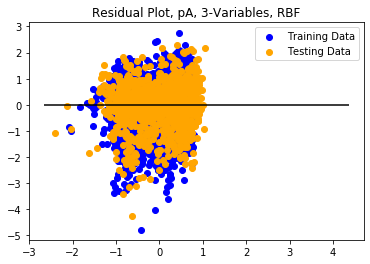

In [225]:
# Plot pA residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pA, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pA_rbf_residual.png', dpi=96)
plt.show()

In [163]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [164]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [165]:
daily_pA['Predicted_pA'] = y_predicted
daily_pA['Error'] = daily_pA['Predicted_pA'] - daily_pA['pA']
daily_pA.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pA,Predicted_pA,Error
0,2002-01-02,23.489290,0.217506,86.0,0.209,0.213462,0.004462
1,2002-01-03,23.504239,0.219029,93.0,0.229,0.214599,-0.014401
2,2002-01-04,24.692335,0.218939,89.0,0.223,0.215536,-0.007464
3,2002-01-07,22.959558,0.217301,75.0,0.221,0.212807,-0.008193
4,2002-01-08,24.757384,0.217990,85.0,0.221,0.214907,-0.006093


In [166]:
# Get a datetime column
from datetime import datetime
daily_pA['datetime'] = daily_pA['datetime'].astype(str)
datetime_list = []
for i in range(len(daily_pA)):
    datetime_list.append(datetime.strptime(daily_pA['datetime'][i],'%Y-%m-%d'))

In [167]:
daily_pA['datetime'] = datetime_list
daily_pA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509 entries, 0 to 4508
Data columns (total 7 columns):
datetime                 4509 non-null datetime64[ns]
average_exhaustion       4509 non-null float64
average_sA               4509 non-null float64
number_extract_points    4509 non-null float64
pA                       4509 non-null float64
Predicted_pA             4509 non-null float64
Error                    4509 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 246.7 KB


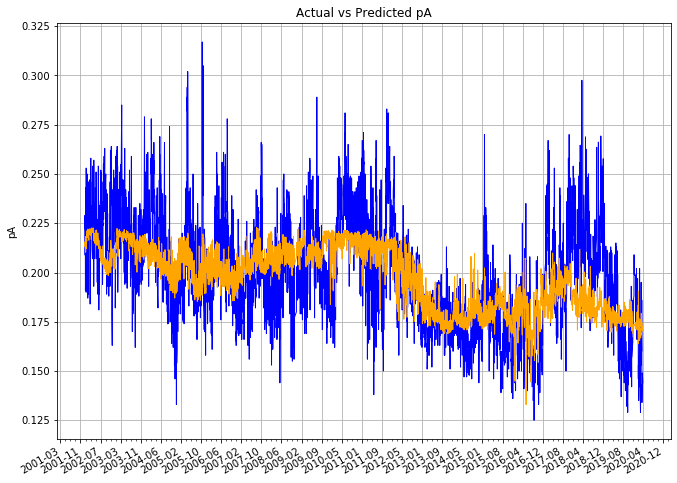

In [168]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pA['datetime'],daily_pA['pA'],c='blue',linewidth = 1)
ax1.plot(daily_pA['datetime'],daily_pA['Predicted_pA'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pA')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pA')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/daily_pA_rbf.png', dpi=100)
plt.show()

In [169]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(daily_pA['pA'],daily_pA['Predicted_pA'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 0.0005194333203861488
the R2 Score for the multivariate, RBF regression: 0.28778258794140166


In [64]:
##########################
# pB Testing Starts Here #
##########################

In [68]:
daily_pB = pd.read_csv('Resources/daily_pB.csv',index_col=False)

In [69]:
daily_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 5 columns):
datetime                 2334 non-null object
average_exhaustion       2334 non-null float64
average_sA               2334 non-null float64
number_extract_points    2334 non-null float64
pB                       2334 non-null float64
dtypes: float64(4), object(1)
memory usage: 91.2+ KB


In [226]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pB[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pB['pB'].values.reshape(-1,1)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [228]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [229]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [230]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [75]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [76]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [77]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1, gamma=0.001, score=0.677, total=   0.3s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.619, total=   0.2s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.620, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.614, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.583, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.677, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.619, total=   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.620, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.614, total=   0.2s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   24.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [78]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 10, 'gamma': 0.001}
0.6225226205833612


In [79]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [80]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.640, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.614, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.590, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.589, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.570, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.709, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.715, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.670, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.665, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.673, total=   0.2s
[CV] C=1, epsilon=0.001, gamma=0.1 ...................................
[CV] .

[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.635, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.624, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.617, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.591, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.729, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.742, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.698, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] .

[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.773, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.683, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.645, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.632, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.627, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.603, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.733, total=   0.2s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   25.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [81]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
0.7616899156287593


In [82]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [83]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.000, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.024, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.015, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.009, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.049, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.030, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.035, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ........

[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=-0.464, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.125, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.079, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.263, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.025, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.015, 

[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.024, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.015, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.011, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.256, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[

[CV]  C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1, score=0.730, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1, score=0.734, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1, score=0.700, total=   0.2s
[CV] C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1, score=0.692, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.1, score=0.721, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=2, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9315168571209886, degree=2, epsilon=0.1, gamma=0.001, score=0.671, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=2, eps

[CV]  C=1, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.1, score=0.705, total=   0.3s
[CV] C=1, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.1, score=0.739, total=   0.3s
[CV] C=1, coef0=3.9315168571209886, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9315168571209886, degree=3, epsilon=0.1, gamma=0.001, score=0.681, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9315168571209886, degree=3, epsilon=0.1, gamma=0.001, score=0.633, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9315168571209886, degree=3, epsilon=0.1, gamma=0.001, score=0.626, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9315168571209886, degree=3, epsilon=0.1, gamma=0.001, score=0.620, total=   0.2s
[CV] C=1, coef0=3.9315168571209886, degree=

[CV]  C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.001, score=0.679, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.001, score=0.654, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.001, score=0.651, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.001, score=0.640, total=   0.1s
[CV] C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.01, score=0.732, total=   0.2s
[CV] C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=3.9315168571209886, degree=4, epsilon=0.1, gamma=0.01, score=0.739, total=   0.2s
[CV] C=1, coef0=3.9315168571209886, degree=4

[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.148, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.01 .................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.119, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.231, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.229, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.249, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.224, total=   0.1s
[CV] C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1 ..................
[CV]  C=5, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.189, total=   0.1s
[CV] 

[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.009, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=0.001, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.023, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.014, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.008, total=   0.2s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=

[CV]  C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1, score=0.730, total=   0.4s
[CV] C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1, score=0.733, total=   0.4s
[CV] C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1, score=0.701, total=   0.3s
[CV] C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1, score=0.692, total=   0.4s
[CV] C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.1, score=0.722, total=   0.3s
[CV] C=5, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9315168571209886, degree=2, epsilon=0.01, gamma=0.001, score=0.677, total=   0.1s
[CV] C=5, coef0=3.9315168571209886, de

[CV]  C=5, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.1, score=0.701, total=   1.1s
[CV] C=5, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.1, score=0.735, total=   1.1s
[CV] C=5, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.001, score=0.694, total=   0.1s
[CV] C=5, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.001, score=0.665, total=   0.1s
[CV] C=5, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.001, score=0.646, total=   0.1s
[CV] C=5, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9315168571209886, degree=3, epsilon=0.01, gamma=0.001, score=0.641, total=   0.2s
[CV] C=5, coef0=3.93151685712098

[CV]  C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.001, score=0.729, total=   0.1s
[CV] C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.001, score=0.683, total=   0.1s
[CV] C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.001, score=0.682, total=   0.1s
[CV] C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.001, score=0.699, total=   0.1s
[CV] C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.01, score=0.736, total=   0.4s
[CV] C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.01 
[CV]  C=5, coef0=3.9315168571209886, degree=4, epsilon=0.01, gamma=0.01, score=0.748, total=   0.4s
[CV] C=5, coef0=3.931516857120988

[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.01, score=0.191, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.01, score=0.194, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.01 ...............
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.01, score=0.142, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.223, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.216, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.245, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.01, gamma=0.1, score=0.224, tota

[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.020, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.011, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.009, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.001, score=-0.000, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.197, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.127, total=   0.1s
[CV] C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.01, score=0.169,

[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.129, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.251, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=-0.103, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=0.208, total=   0.1s
[CV] C=10, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.001, score=0.680, total=   0.1s
[CV] C=10, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.001, score=0.629, total=   0.1s
[CV] C=10, coef0=3.9315168571209886, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168

[CV]  C=10, coef0=3.9315168571209886, degree=2, epsilon=0.1, gamma=0.1, score=0.723, total=   0.3s
[CV] C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001, score=0.704, total=   0.1s
[CV] C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001, score=0.691, total=   0.1s
[CV] C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001, score=0.661, total=   0.1s
[CV] C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001, score=0.657, total=   0.1s
[CV] C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=3, epsilon=0.001, gamma=0.001, score=0.650, total=   0.1s
[CV] C=10, 

[CV]  C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.001, score=0.692, total=   0.2s
[CV] C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.001, score=0.687, total=   0.3s
[CV] C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.001, score=0.711, total=   0.3s
[CV] C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.01, score=0.737, total=   0.9s
[CV] C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.01, score=0.751, total=   1.1s
[CV] C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=3.9315168571209886, degree=4, epsilon=0.001, gamma=0.01, score=0.718, total=   1.1s
[CV] C=10, co

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 3.9315168571209886],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [84]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 5, 'coef0': 3.9315168571209886, 'degree': 4, 'epsilon': 0.1, 'gamma': 0.1}
0.7452237790972854


RBF SVR yielded the best results at 0.762 while polynomial (4th degree) was a close second at 0.745. Both have significantly greater scores than the OLS model at 0.616. RBF will be used for Daily pB regression

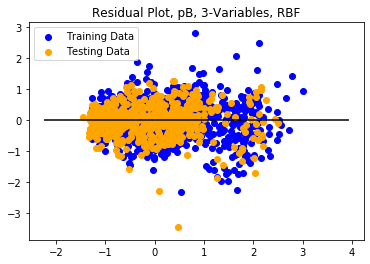

In [231]:
# Plot pB residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pB, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pB_rbf_residual.png', dpi=96)
plt.show()

In [176]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [177]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [178]:
daily_pB['Predicted_pB'] = y_predicted
daily_pB['Error'] = daily_pB['Predicted_pB'] - daily_pB['pB']
daily_pB.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pB,Predicted_pB,Error
0,2009-08-12,47.836660,0.236600,148.0,1.556,1.497907,-0.058093
1,2009-08-13,45.127344,0.239869,141.0,1.324,1.583918,0.259918
2,2009-08-14,46.250910,0.237382,154.0,1.545,1.494219,-0.050781
3,2009-08-15,47.276493,0.238790,152.0,1.512,1.549023,0.037023
4,2009-08-16,45.022368,0.240766,162.0,1.077,1.582950,0.505950


In [179]:
# Get a datetime column
from datetime import datetime
daily_pB['datetime'] = daily_pB['datetime'].astype(str)
datetime_list = []
for i in range(len(daily_pB)):
    datetime_list.append(datetime.strptime(daily_pB['datetime'][i],'%Y-%m-%d'))

In [180]:
daily_pB['datetime'] = datetime_list
daily_pB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 7 columns):
datetime                 2334 non-null datetime64[ns]
average_exhaustion       2334 non-null float64
average_sA               2334 non-null float64
number_extract_points    2334 non-null float64
pB                       2334 non-null float64
Predicted_pB             2334 non-null float64
Error                    2334 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 127.7 KB


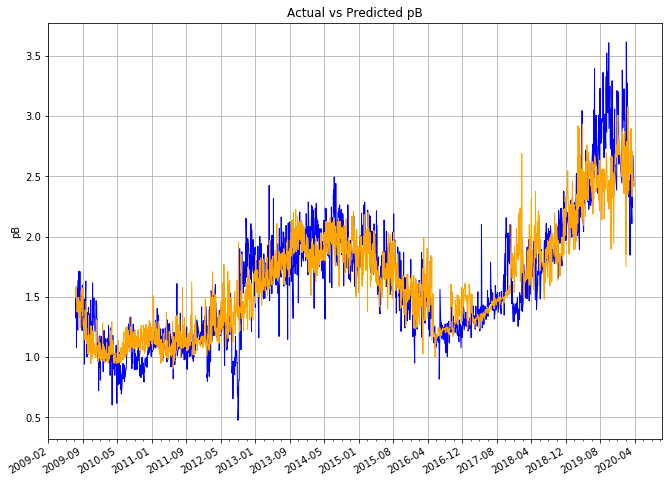

In [181]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pB['datetime'],daily_pB['pB'],c='blue',linewidth = 1)
ax1.plot(daily_pB['datetime'],daily_pB['Predicted_pB'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pB')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pB')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/daily_pB_rbf.png', dpi=100)
plt.show()

In [182]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(daily_pB['pB'],daily_pB['Predicted_pB'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 0.060830507931128104
the R2 Score for the multivariate, RBF regression: 0.7639199627998821


In [105]:
##########################
# pC Testing Starts Here #
##########################

In [183]:
daily_pC = pd.read_csv('Resources/daily_pC.csv',index_col=False)

In [184]:
daily_pC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 5 columns):
datetime                 455 non-null object
average_exhaustion       455 non-null float64
average_sA               455 non-null float64
number_extract_points    455 non-null float64
pC                       455 non-null float64
dtypes: float64(4), object(1)
memory usage: 17.9+ KB


In [185]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pC[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pC['pC'].values.reshape(-1,1)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [187]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [188]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [189]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [113]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [114]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [115]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.003, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.107, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.033, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.062, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.150, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.003, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=5, gamma=0.001, score=0.151, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.005, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.107, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.033, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.060, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.151, total=   0.0s
[CV] C=5, gamma=0.1 ..................................................
[CV] ...................... C=5, gamma=0.1, score=0.005, total=   0.0s
[CV] C=5, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.7s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [116]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 10, 'gamma': 0.001}
0.07117113378644231


In [117]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [118]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.017, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.059, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] .... C=1, epsilon=0.001, gamma=0.001, score=-0.048, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.043, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.079, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.031, total=   0.0s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=1, epsilon=0.1, gamma=0.001, score=-0.038, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] ....... C=1, epsilon=0.1, gamma=0.001, score=0.036, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.001 ...................................
[CV] ....... C=1, epsilon=0.1, gamma=0.001, score=0.065, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.01 ....................................
[CV] ........ C=1, epsilon=0.1, gamma=0.01, score=0.032, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.01 ....................................
[CV] ........ C=1, epsilon=0.1, gamma=0.01, score=0.141, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.01 ....................................
[CV] ........ C=1, epsilon=0.1, gamma=0.01, score=0.037, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.01 ....................................
[CV] ........ C=1, epsilon=0.1, gamma=0.01, score=0.087, total=   0.0s
[CV] C=1, epsilon=0.1, gamma=0.01 ....................................
[CV] .

[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.303, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.005, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.100, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.018, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.066, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.144, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.121, total=   0.0s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.8s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [119]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 5, 'epsilon': 0.1, 'gamma': 0.1}
0.22316476025894288


In [120]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [121]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.079, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.004, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.110, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.007, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=-0.026, total=   0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.074, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.003, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.102, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.006, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001 ................
[CV]  C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.001, score=-0.012, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.01 .................
[CV]  C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=-0.027, total=   0.0s
[CV] C=1, coef0=0, degree=2, epsilon=0.1, gamma=0.01 .................

[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.008, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.079, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.004, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.110, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.001, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.01, score=-0.007, total=   0.0s
[CV] C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0

[CV]  C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001, score=-0.006, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001, score=0.080, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001, score=0.002, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001, score=0.057, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001 
[CV]  C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.001, score=0.118, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.01 
[CV]  C=1, coef0=5.2028845062700055, degree=2, epsilon=0.01, gamma=0.01, score=0.010, total=   0.0s
[CV] C=1, coef0=5.202884506270

[CV]  C=1, coef0=5.2028845062700055, degree=3, epsilon=0.01, gamma=0.1, score=0.222, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=3, epsilon=0.01, gamma=0.1 
[CV]  C=1, coef0=5.2028845062700055, degree=3, epsilon=0.01, gamma=0.1, score=0.277, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=5.2028845062700055, degree=3, epsilon=0.1, gamma=0.001, score=0.004, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=5.2028845062700055, degree=3, epsilon=0.1, gamma=0.001, score=0.107, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=5.2028845062700055, degree=3, epsilon=0.1, gamma=0.001, score=0.029, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=3, epsilon=0.1, gamma=0.001 
[CV]  C=1, coef0=5.2028845062700055, degree=3, epsilon=0.1, gamma=0.001, score=0.064, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=

[CV]  C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01, score=0.167, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01, score=0.301, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01, score=0.078, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01, score=0.197, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01 
[CV]  C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.01, score=0.298, total=   0.0s
[CV] C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.1 .
[CV]  C=1, coef0=5.2028845062700055, degree=4, epsilon=0.1, gamma=0.1, score=0.212, total=   0.1s
[CV] C=1, coef0=5.2028845062700055, degree=4, epsilo

[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.001, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.003, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.006, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.039, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=-0.051, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.014, total=   0.0s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.007, tota

[CV]  C=5, coef0=0, degree=4, epsilon=0.1, gamma=0.1, score=-0.036, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001, score=-0.005, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001, score=0.095, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001, score=0.032, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001, score=0.064, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001 
[CV]  C=5, coef0=5.2028845062700055, degree=2, epsilon=0.001, gamma=0.001, score=0.134, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, d

[CV]  C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01, score=0.075, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01, score=0.187, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01, score=0.301, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.1, score=0.185, total=   0.1s
[CV] C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.1, score=0.265, total=   0.1s
[CV] C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.1, score=0.023, total=   0.1s
[CV] C=5, coef0=5.2028845062700055,

[CV]  C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1, score=0.171, total=   0.6s
[CV] C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1, score=0.339, total=   0.8s
[CV] C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1, score=-0.013, total=   0.7s
[CV] C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1, score=0.222, total=   0.4s
[CV] C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=5, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1, score=0.256, total=   0.4s
[CV] C=5, coef0=5.2028845062700055, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=5, coef0=5.2028845062700055, degree=4, epsilon=0.01, gamma=0.001, score=0.081, total=   0.0s
[CV] C=5, coef0=5.2028845062700055, d

[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.220, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.079, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.005, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.110, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.008, total=   0.0s
[CV] C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=3, epsilon=0.001, gamma=0.01,

[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.003, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.103, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.006, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001 ...............
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.001, score=-0.013, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.072, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.002, total=   0.0s
[CV] C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=4, epsilon=0.1, gamma=0.01, score=-0.1

[CV]  C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.001, score=0.046, total=   0.0s
[CV] C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.001, score=0.087, total=   0.0s
[CV] C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.001 
[CV]  C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.001, score=0.177, total=   0.0s
[CV] C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01, score=0.175, total=   0.0s
[CV] C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01, score=0.290, total=   0.0s
[CV] C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=5.2028845062700055, degree=3, epsilon=0.001, gamma=0.01, score=0.065, total=   0.0s
[CV] C=10, co

[CV]  C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01, score=0.184, total=   0.1s
[CV] C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01, score=0.294, total=   0.1s
[CV] C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01, score=0.078, total=   0.1s
[CV] C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01, score=0.218, total=   0.1s
[CV] C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.01, score=0.276, total=   0.1s
[CV] C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1 
[CV]  C=10, coef0=5.2028845062700055, degree=4, epsilon=0.001, gamma=0.1, score=0.121, total=   1.0s
[CV] C=10, coef0=5.2

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:   32.6s finished
C:\Users\ngoodwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 5.2028845062700055],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [122]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 1, 'coef0': 5.2028845062700055, 'degree': 4, 'epsilon': 0.1, 'gamma': 0.1}
0.22050090913343046


RBF SVR yielded the best results at 0.223 while polynomial (4th degree) was a close second at 0.220. Both have significantly greater scores than the OLS model at 0.121. RBF will be used for Daily pC regression even though the score is generally low

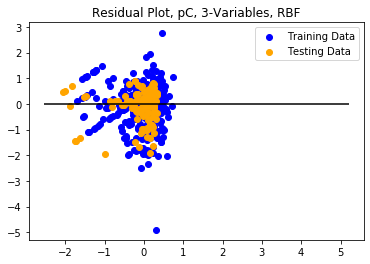

In [190]:
# Plot pC residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=5, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pC, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pC_rbf_residual.png', dpi=96)
plt.show()

In [191]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [192]:
model = SVR(kernel='rbf', C=5, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [193]:
daily_pC['Predicted_pC'] = y_predicted
daily_pC['Error'] = daily_pC['Predicted_pC'] - daily_pC['pC']
daily_pC.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pC,Predicted_pC,Error
0,2017-08-23,43.194169,0.185240,111.0,0.001333,0.001662,0.000329
1,2017-08-24,43.655595,0.188209,145.0,0.002000,0.001389,-0.000611
2,2017-08-28,42.783531,0.189823,150.0,0.001333,0.001345,0.000012
3,2017-08-29,43.937784,0.189681,136.0,0.001000,0.001436,0.000436
4,2017-09-05,44.898303,0.193390,149.0,0.001000,0.001378,0.000378


In [194]:
# Get a datetime column
from datetime import datetime
daily_pC['datetime'] = daily_pC['datetime'].astype(str)
datetime_list = []
for i in range(len(daily_pC)):
    datetime_list.append(datetime.strptime(daily_pC['datetime'][i],'%Y-%m-%d'))

In [195]:
daily_pC['datetime'] = datetime_list
daily_pC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 7 columns):
datetime                 455 non-null datetime64[ns]
average_exhaustion       455 non-null float64
average_sA               455 non-null float64
number_extract_points    455 non-null float64
pC                       455 non-null float64
Predicted_pC             455 non-null float64
Error                    455 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 25.0 KB


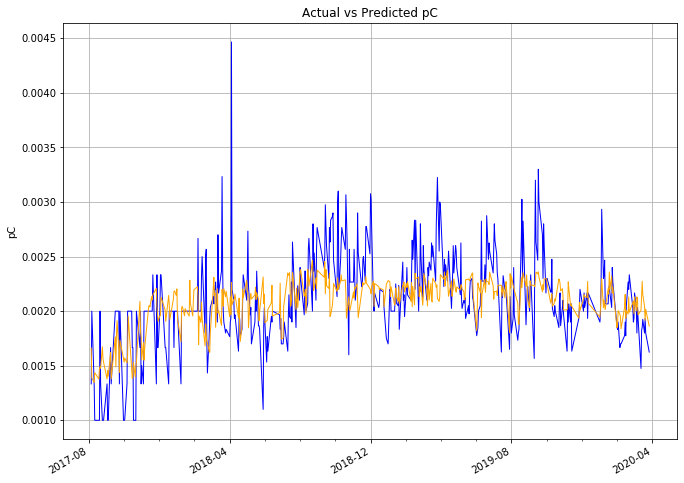

In [196]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pC['datetime'],daily_pC['pC'],c='blue',linewidth = 1)
ax1.plot(daily_pC['datetime'],daily_pC['Predicted_pC'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pC')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pC')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/daily_pC_rbf.png', dpi=100)
plt.show()

In [197]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(daily_pC['pC'],daily_pC['Predicted_pC'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 1.272112017742532e-07
the R2 Score for the multivariate, RBF regression: 0.31456902531401265


In [198]:
##########################
# pD Testing Starts Here #
##########################

In [199]:
daily_pD = pd.read_csv('Resources/daily_pD.csv',index_col=False)

In [200]:
daily_pD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 5 columns):
datetime                 2335 non-null object
average_exhaustion       2335 non-null float64
average_sA               2335 non-null float64
number_extract_points    2335 non-null float64
pD                       2335 non-null float64
dtypes: float64(4), object(1)
memory usage: 91.3+ KB


In [232]:
# Testing SVR, KNN is a claffification technique and needs binary results
from sklearn.svm import SVR
X = daily_pD[['average_exhaustion','average_sA','number_extract_points']]
y = daily_pD['pD'].values.reshape(-1,1)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [234]:
# Scale data so SVR can be used
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [235]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [236]:
y_ravel = y_train_scaled.ravel()
y_train_array = np.array(y_ravel).astype(float)
y_test_ravel = y_test_scaled.ravel()
y_test_array = np.array(y_test_ravel).astype(float)

In [139]:
# there are rbf, linear, and poly options in SVR
model = SVR(kernel='linear')

In [140]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [141]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.103, total=   0.1s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.147, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.078, total=   0.1s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.122, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.141, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.103, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.147, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.078, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.122, total=   0.1s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.141, total=   0.1s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   12.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [142]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with the rbf and poly functions

{'C': 1, 'gamma': 0.001}
0.11804711048896137


In [143]:
model = SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [144]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.120, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.130, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.088, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.113, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.001 .................................
[CV] ..... C=1, epsilon=0.001, gamma=0.001, score=0.149, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.234, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.239, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.207, total=   0.1s
[CV] C=1, epsilon=0.001, gamma=0.01 ..................................
[CV] ...... C=1, epsilon=0.001, gamma=0.01, score=0.215, total=   0.1s
[CV] 

[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.130, total=   0.2s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.158, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.103, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.134, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.001 ..................................
[CV] ...... C=5, epsilon=0.01, gamma=0.001, score=0.160, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.301, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] ....... C=5, epsilon=0.01, gamma=0.01, score=0.277, total=   0.1s
[CV] C=5, epsilon=0.01, gamma=0.01 ...................................
[CV] .

[CV] ....... C=10, epsilon=0.01, gamma=0.1, score=0.451, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.138, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.171, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.113, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.148, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.001 ..................................
[CV] ...... C=10, epsilon=0.1, gamma=0.001, score=0.165, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] ....... C=10, epsilon=0.1, gamma=0.01, score=0.316, total=   0.1s
[CV] C=10, epsilon=0.1, gamma=0.01 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   13.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [145]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_) #will repeat with poly function

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
0.48833467049258705


In [146]:
model = SVR(kernel='poly')
from sklearn.model_selection import GridSearchCV
param_grid = {'degree':[2,3,4],
              'C': [1, 5, 10],
              'gamma': [0.001, 0.01, 0.1],
             'epsilon':[0.001,0.01,0.1],
             'coef0':[min(1-X_train_scaled.min(),0),max(X_train_scaled.max(),y_train_array.max())]}
grid = GridSearchCV(model, param_grid, verbose=3, cv=5)

In [147]:
grid.fit(X_train_scaled, y_train_array)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.024, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.006, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=-0.036, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.001, score=0.000, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.055, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.025, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.041, total=   0.1s
[CV] C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01 ...............
[CV]  C=1, coef0=0, degree=2, epsilon=0.001, gamma=0.01, score=0.

[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.035, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.018, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1 ................
[CV]  C=1, coef0=0, degree=3, epsilon=0.001, gamma=0.1, score=0.054, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.002, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.028, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.008, total=   0.1s
[CV] C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001 ...............
[CV]  C=1, coef0=0, degree=3, epsilon=0.01, gamma=0.001, score=-0.033,

[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.028, total=   0.2s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.008, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.033, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01 ................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.01, score=-0.001, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.057, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.031, total=   0.1s
[CV] C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1 .................
[CV]  C=1, coef0=0, degree=4, epsilon=0.01, gamma=0.1, score=0.034, total=

[CV]  C=1, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.1, score=0.276, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.1 ...
[CV]  C=1, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.1, score=0.249, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.1 ...
[CV]  C=1, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.1, score=0.216, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=2, epsilon=0.1, gamma=0.001 ..
[CV]  C=1, coef0=4.1392512785488, degree=2, epsilon=0.1, gamma=0.001, score=0.119, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=2, epsilon=0.1, gamma=0.001 ..
[CV]  C=1, coef0=4.1392512785488, degree=2, epsilon=0.1, gamma=0.001, score=0.149, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=2, epsilon=0.1, gamma=0.001 ..
[CV]  C=1, coef0=4.1392512785488, degree=2, epsilon=0.1, gamma=0.001, score=0.090, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=2, epsilon=0.1, gamma=0.00

[CV]  C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.001, score=0.153, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01 ...
[CV]  C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01, score=0.296, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01 ...
[CV]  C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01, score=0.274, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01 ...
[CV]  C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01, score=0.275, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01 ...
[CV]  C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01, score=0.251, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01 ...
[CV]  C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.01, score=0.222, total=   0.1s
[CV] C=1, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.1 ..

[CV]  C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.01, score=0.219, total=   0.2s
[CV] C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1 ....
[CV]  C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1, score=0.485, total=   0.7s
[CV] C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1 ....
[CV]  C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1, score=0.429, total=   0.7s
[CV] C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1 ....
[CV]  C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1, score=0.392, total=   0.8s
[CV] C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1 ....
[CV]  C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1, score=0.401, total=   0.7s
[CV] C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1 ....
[CV]  C=1, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.1, score=0.406, total=   0.7s
[CV] C=5, coef0=0, degree=2, epsilon=0.001, gamma=0.001 ..............
[CV

[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.036, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001 ..............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.001, score=-0.000, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=0.009, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.018, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.002, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=-0.030, total=   0.1s
[CV] C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01 ...............
[CV]  C=5, coef0=0, degree=3, epsilon=0.001, gamma=0.01, score=

[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.053, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=0.038, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1 ................
[CV]  C=5, coef0=0, degree=4, epsilon=0.001, gamma=0.1, score=-0.025, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.002, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.028, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.008, total=   0.1s
[CV] C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001 ...............
[CV]  C=5, coef0=0, degree=4, epsilon=0.01, gamma=0.001, score=-0.033

[CV]  C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01, score=0.268, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01 ..
[CV]  C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01, score=0.258, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01 ..
[CV]  C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01, score=0.243, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01 ..
[CV]  C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01, score=0.231, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01 ..
[CV]  C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.01, score=0.210, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.1 ...
[CV]  C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0.1, score=0.306, total=   0.2s
[CV] C=5, coef0=4.1392512785488, degree=2, epsilon=0.01, gamma=0

[CV]  C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.01, score=0.214, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1 ...
[CV]  C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1, score=0.388, total=   0.6s
[CV] C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1 ...
[CV]  C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1, score=0.290, total=   0.6s
[CV] C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1 ...
[CV]  C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1, score=0.280, total=   0.7s
[CV] C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1 ...
[CV]  C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1, score=0.221, total=   0.6s
[CV] C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1 ...
[CV]  C=5, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.1, score=0.280, total=   0.6s
[CV] C=5, coef0=4.1392512785488, degree=3, epsilon=0.1, gamma=0.001 

[CV]  C=5, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.1, score=0.416, total=   2.0s
[CV] C=5, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.1 ...
[CV]  C=5, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.1, score=0.414, total=   2.5s
[CV] C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.001 ..
[CV]  C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.001, score=0.270, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.001 ..
[CV]  C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.001, score=0.264, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.001 ..
[CV]  C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.001, score=0.247, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.001 ..
[CV]  C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.001, score=0.235, total=   0.1s
[CV] C=5, coef0=4.1392512785488, degree=4, epsilon=0.1, gamma=0.0

[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.096, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.029, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.076, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.039, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01 ................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.01, score=0.033, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.101, total=   0.1s
[CV] C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1 .................
[CV]  C=10, coef0=0, degree=2, epsilon=0.1, gamma=0.1, score=0.032, total=   

[CV]  C=10, coef0=0, degree=3, epsilon=0.1, gamma=0.1, score=0.041, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.002, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.025, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.007, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.036, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001 .............
[CV]  C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.001, score=-0.000, total=   0.1s
[CV] C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.01 ..............
[CV]  C=10, coef0=0, degree=4, epsilon=0.001, gamma=0.01,

[CV]  C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.01, score=0.243, total=   0.1s
[CV] C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.01 
[CV]  C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.01, score=0.211, total=   0.1s
[CV] C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.1 .
[CV]  C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.1, score=0.307, total=   0.3s
[CV] C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.1 .
[CV]  C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.1, score=0.257, total=   0.4s
[CV] C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.1 .
[CV]  C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.1, score=0.273, total=   0.4s
[CV] C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.1 .
[CV]  C=10, coef0=4.1392512785488, degree=2, epsilon=0.001, gamma=0.1, score=0.259, total=   0.4s
[CV] C=10, coef0=4.1392512785488, degree=2, epsilon=0.0

[CV]  C=10, coef0=4.1392512785488, degree=3, epsilon=0.001, gamma=0.1, score=0.280, total=   1.4s
[CV] C=10, coef0=4.1392512785488, degree=3, epsilon=0.001, gamma=0.1 .
[CV]  C=10, coef0=4.1392512785488, degree=3, epsilon=0.001, gamma=0.1, score=0.216, total=   1.3s
[CV] C=10, coef0=4.1392512785488, degree=3, epsilon=0.001, gamma=0.1 .
[CV]  C=10, coef0=4.1392512785488, degree=3, epsilon=0.001, gamma=0.1, score=0.283, total=   1.2s
[CV] C=10, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.001, score=0.197, total=   0.1s
[CV] C=10, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.001, score=0.224, total=   0.1s
[CV] C=10, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=4.1392512785488, degree=3, epsilon=0.01, gamma=0.001, score=0.169, total=   0.1s
[CV] C=10, coef0=4.1392512785488, degree=3, epsilon=0.

[CV]  C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.001, score=0.273, total=   0.2s
[CV] C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.001, score=0.272, total=   0.2s
[CV] C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.001, score=0.245, total=   0.2s
[CV] C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.001 
[CV]  C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.001, score=0.211, total=   0.2s
[CV] C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.01 .
[CV]  C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.01, score=0.337, total=   0.6s
[CV] C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.01 .
[CV]  C=10, coef0=4.1392512785488, degree=4, epsilon=0.01, gamma=0.01, score=0.286, total=   0.7s
[CV] C=10, coef0=4.1392512785488, degree=4, epsilon=0

[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'coef0': [0, 4.1392512785488],
                         'degree': [2, 3, 4], 'epsilon': [0.001, 0.01, 0.1],
                         'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [148]:
# List the best parameters for this dataset
print(grid.best_params_)
# List the best score
print(grid.best_score_)

{'C': 10, 'coef0': 4.1392512785488, 'degree': 4, 'epsilon': 0.1, 'gamma': 0.1}
0.43465476812893766


RBF SVR yielded the best results at 0.488 while polynomial (4th degree) was in second at 0.435. Both have significantly greater scores than the OLS model at 0.128. RBF will be used for Daily pD regression

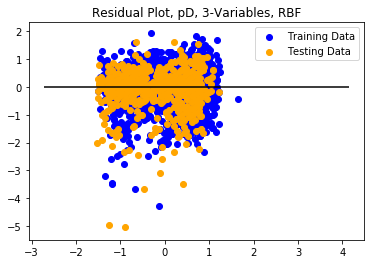

In [237]:
# Plot pD residuals based on 3-variable, RBF SVR model
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
X_train_x = model.fit(X_train_scaled,y_train_array).predict(X_train_scaled)
X_test_x = model.fit(X_test_scaled,y_test_array).predict(X_test_scaled)
plt.scatter(X_train_x,X_train_x - y_train_array, c='blue',label='Training Data')
plt.scatter(X_test_x,X_test_x - y_test_array, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y_train_array.min(),xmax=y_train_array.max())
plt.title('Residual Plot, pD, 3-Variables, RBF')
fig.set_size_inches(6, 4)
fig.savefig('Images/day_pD_rbf_residual.png', dpi=96)
plt.show()

In [211]:
# Plot actual and predicted values
# Transform full set of data
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)
# Change y into terms that the SVR can use
y_ravel = y_scaled.ravel()
y_array = np.array(y_ravel).astype(float)

In [212]:
model = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
# Inverse the transformation of y
y_predicted = y_scaler.inverse_transform((model.fit(X_scaled,y_array).predict(X_scaler.transform(X))))

In [213]:
daily_pD['Predicted_pD'] = y_predicted
daily_pD['Error'] = daily_pD['Predicted_pD'] - daily_pD['pD']
daily_pD.head()

,datetime,average_exhaustion,average_sA,number_extract_points,pD,Predicted_pD,Error
0,2009-08-12,47.836660,0.236600,148.0,0.017,0.016610,-0.000390
1,2009-08-13,45.127344,0.239869,141.0,0.021,0.018218,-0.002782
2,2009-08-14,46.250910,0.237382,154.0,0.016,0.016643,0.000643
3,2009-08-15,47.276493,0.238790,152.0,0.019,0.017713,-0.001287
4,2009-08-17,44.291179,0.236525,152.0,0.025,0.015808,-0.009192


In [214]:
# Get a datetime column
from datetime import datetime
daily_pD['datetime'] = daily_pD['datetime'].astype(str)
datetime_list = []
for i in range(len(daily_pD)):
    datetime_list.append(datetime.strptime(daily_pD['datetime'][i],'%Y-%m-%d'))

In [215]:
daily_pD['datetime'] = datetime_list
daily_pD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
datetime                 2335 non-null datetime64[ns]
average_exhaustion       2335 non-null float64
average_sA               2335 non-null float64
number_extract_points    2335 non-null float64
pD                       2335 non-null float64
Predicted_pD             2335 non-null float64
Error                    2335 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 127.8 KB


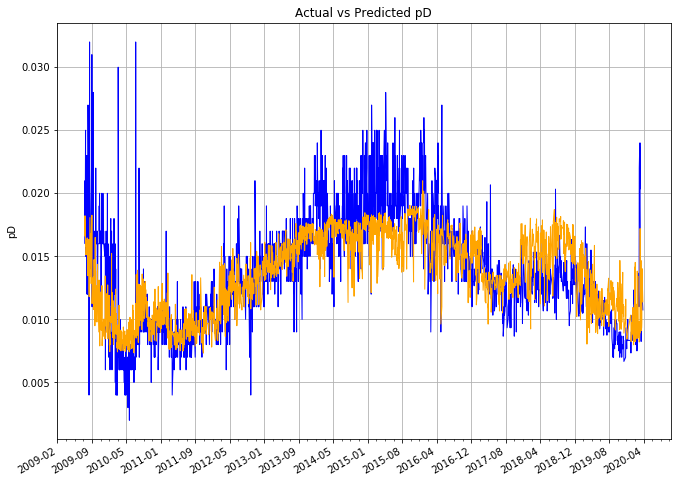

In [216]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 240
tick_spacing_minor = 60
fig, ax1 = plt.subplots()
ax1.plot(daily_pD['datetime'],daily_pD['pD'],c='blue',linewidth = 1)
ax1.plot(daily_pD['datetime'],daily_pD['Predicted_pD'],c='orange',linewidth = 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax1.set_ylabel('pD')


fig.autofmt_xdate()
plt.grid(True)
plt.title('Actual vs Predicted pD')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/daily_pD_rbf.png', dpi=100)
plt.show()

In [217]:
print("MSE for the multivariate, RBF regression: "+str(mean_squared_error(daily_pD['pD'],daily_pD['Predicted_pD'])))
print("the R2 Score for the multivariate, RBF regression: "+str(model.score(X_scaled,y_array)))

MSE for the multivariate, RBF regression: 9.773529131405647e-06
the R2 Score for the multivariate, RBF regression: 0.496956045686936
